In [81]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from os import chdir


In [66]:
chdir("C:\\Users\Georges-Singa\\Desktop\\IA\\Checkpoints_5")
df = pd.read_csv("titanic-passengers.csv", sep=';')

In [67]:
df["Survived"] = df["Survived"].replace(["No", "Yes"], [0, 1]).astype(float)

In [68]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
del df["Name"]

In [69]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [70]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [71]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,2,male,28.000000,0,0,248740,13.0000,NaN,S
1,76,3,male,25.000000,0,0,348123,7.6500,F G73,S
2,641,3,male,20.000000,0,0,350050,7.8542,NaN,S
3,568,3,female,29.000000,0,4,349909,21.0750,NaN,S
4,672,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...
886,10,2,female,14.000000,1,0,237736,30.0708,NaN,C
887,61,3,male,22.000000,0,0,2669,7.2292,NaN,C
888,535,3,female,30.000000,0,0,315084,8.6625,NaN,S
889,102,3,male,29.699118,0,0,349215,7.8958,NaN,S


In [72]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    1.0
887    0.0
888    0.0
889    0.0
890    1.0
Name: Survived, Length: 891, dtype: float64

In [73]:
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [75]:
logistik_reg = LogisticRegression()

In [76]:
logistik_reg.fit(x_train, y_train)

LogisticRegression()

In [78]:
y_prediction = logistik_reg.predict(x_test)

In [79]:
mat_conf = pd.crosstab(y_test, y_prediction)

<AxesSubplot:xlabel='col_0', ylabel='Survived'>

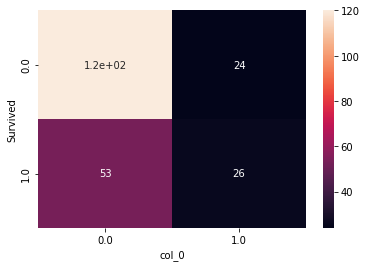

In [83]:
sns.heatmap(mat_conf, annot = True)

In [ ]:
""" ROC (Receiver Operating Curve), est une courbe représentant le taux de True Positives en fonction de taux de False Positives.
    AUC (Area Under the Curve)  est l'aire sous la courbe ROC."""